In [25]:
import pandas as pd
import numpy as np
import datetime
from functools import reduce
import matplotlib.pyplot as plt
from scipy.stats import linregress

covid_re = pd.read_csv("Final Merge 7_16_20.csv")

covid_all = covid_re.drop(columns=['Unnamed: 0'])
covid_rep = covid_all[covid_all.Political_Party == "Republican"]
covid_dem = covid_all[covid_all.Political_Party == "Democratic"]
covid_all.head()

,County,NewPos_All,Age 0-19_cases,Age 20-39_cases,Age 40-59_cases,Age 60-79_cases,Age 80+_cases,Positive UnkAge_cases,Deaths,Age 0-19_death,...,Positive UnkAge_hospitalization,Political_Party,Percent Below Poverty Level,Household Income Median,Household Income Mean,Population,Pop_per100k,Case_per100k,Deaths_per100k,Hoptializations_per100k
0,Adams County,166.0,17.0,63.0,59.0,25.0,0.0,2.0,0.0,0.0,...,0.0,Republican,25.2,49142.0,61370.0,19983.0,0.19983,830.706100,0.000000,45.038283
1,Asotin County,21.0,1.0,1.0,10.0,7.0,2.0,0.0,2.0,0.0,...,0.0,Republican,13.0,50423.0,65079.0,22582.0,0.22582,92.994420,8.856611,4.428306
2,Benton County,1956.0,185.0,747.0,572.0,285.0,166.0,1.0,85.0,0.0,...,0.0,Republican,12.8,65650.0,83941.0,204390.0,2.04390,956.993982,41.587162,114.976271
3,Chelan County,403.0,47.0,175.0,127.0,42.0,12.0,0.0,6.0,0.0,...,0.0,Republican,11.6,56135.0,75117.0,77200.0,0.77200,522.020725,7.772021,23.316062
4,Clallam County,43.0,6.0,15.0,10.0,10.0,2.0,0.0,0.0,0.0,...,0.0,Democratic,15.9,49913.0,65858.0,77331.0,0.77331,55.605126,0.000000,3.879427


R value =  0.1
R squared =  0.01
p value = 0.5631494008241555 , significant at the alpha of .05


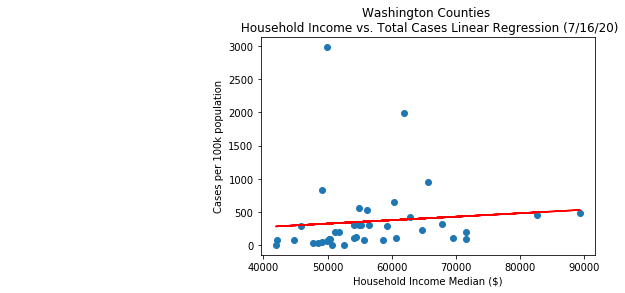

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Household Income Median"], covid_all["Case_per100k"])
regress_values = covid_all["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Household Income Median"], covid_all["Case_per100k"])
plt.plot(covid_all["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Counties \n Household Income vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_i_c.png")

R value =  0.28
R squared =  0.08
p value = 0.1818452565521895 , significant at the alpha of .05


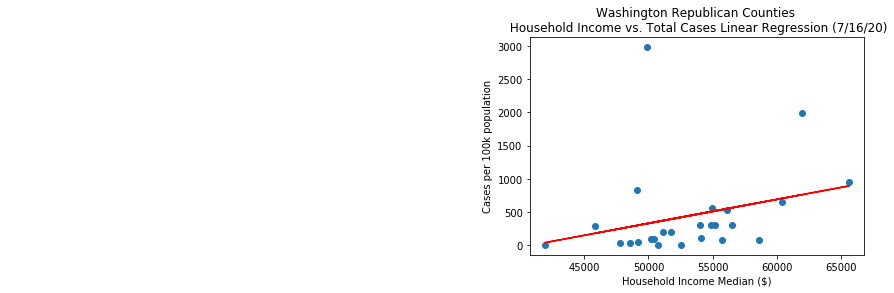

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Household Income Median"], covid_rep["Case_per100k"])
regress_values = covid_rep["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Household Income Median"], covid_rep["Case_per100k"])
plt.plot(covid_rep["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Cases per 100k population')    
plt.title("Washington Republican Counties \n Household Income vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_i_c.png")

R value =  0.69
R squared =  0.48
p value = 0.0058881592904625815 , significant at the alpha of .05


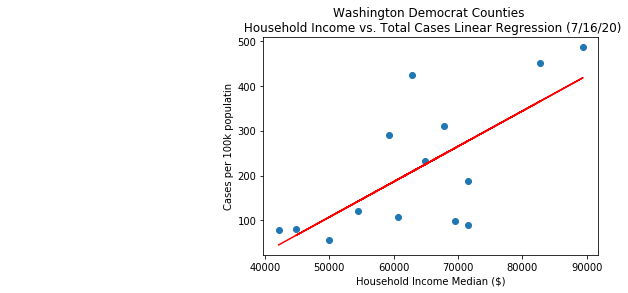

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Household Income Median"], covid_dem["_per100k"])
regress_values = covid_dem["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Household Income Median"], covid_dem["Case_per100k"])
plt.plot(covid_dem["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Cases per 100k populatin')    
plt.title("Washington Democrat Counties \n Household Income vs. Total Cases Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_i_c.png")

R value =  0.31
R squared =  0.1
p value = 0.054398641582970905 , significant at the alpha of .05


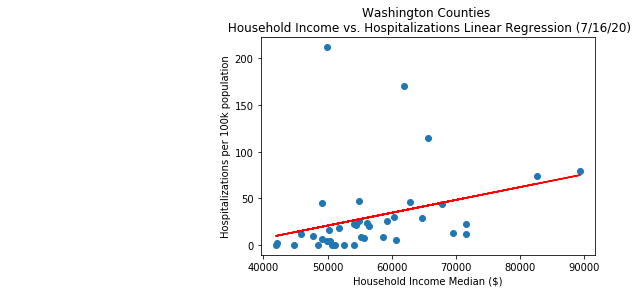

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Household Income Median"], covid_all["Hoptializations_per100k"])
regress_values = covid_all["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Household Income Median"], covid_all["Hoptializations_per100k"])
plt.plot(covid_all["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Hospitalizations per 100k population')    
plt.title("Washington Counties \n Household Income vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_h_c.png")

R value =  0.36
R squared =  0.13
p value = 0.07523998396944442 , significant at the alpha of .05


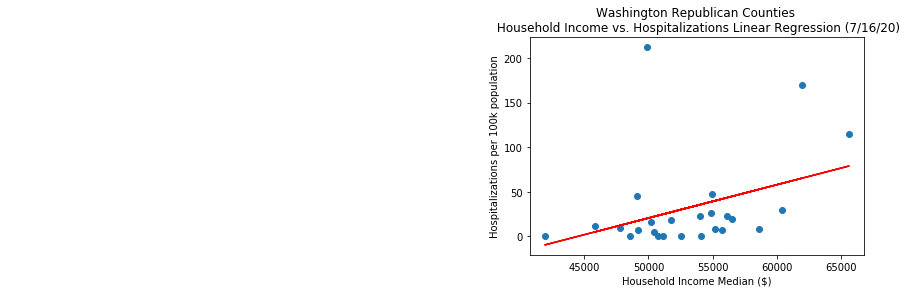

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Household Income Median"], covid_rep["Hoptializations_per100k"])
regress_values = covid_rep["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Household Income Median"], covid_rep["Hoptializations_per100k"])
plt.plot(covid_rep["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Hospitalizations per 100k population')    
plt.title("Washington Republican Counties \n Household Income vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_h_c.png")

R value =  0.8
R squared =  0.64
p value = 0.0005929976999931672 , significant at the alpha of .05


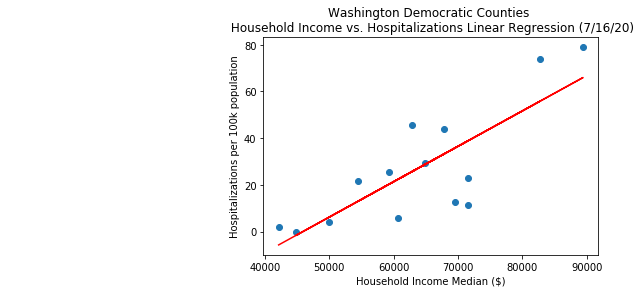

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Household Income Median"], covid_dem["Hoptializations_per100k"])
regress_values = covid_dem["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Household Income Median"], covid_dem["Hoptializations_per100k"])
plt.plot(covid_dem["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Hospitalizations per 100k population')    
plt.title("Washington Democratic Counties \n Household Income vs. Hospitalizations Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_h_c.png")

R value =  0.34
R squared =  0.11
p value = 0.03601050544112323 , significant at the alpha of .05


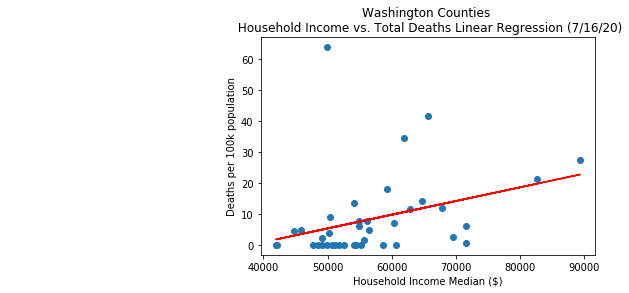

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_all["Household Income Median"], covid_all["Deaths_per100k"])
regress_values = covid_all["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_all["Household Income Median"], covid_all["Deaths_per100k"])
plt.plot(covid_all["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Counties \n Household Income vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/rega_d_c.png")

R value =  0.35
R squared =  0.12
p value = 0.08709111564494057 , significant at the alpha of .05


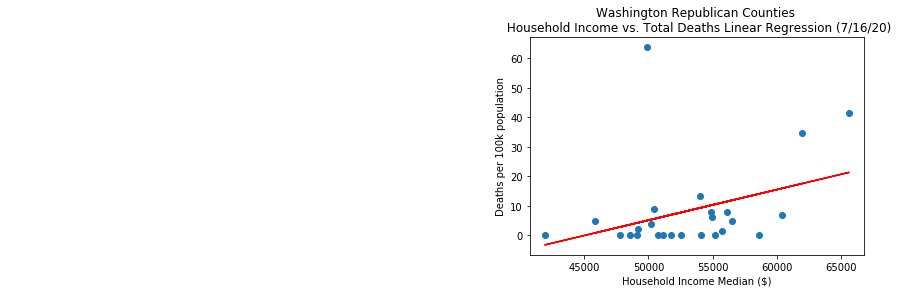

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_rep["Household Income Median"], covid_rep["Deaths_per100k"])
regress_values = covid_rep["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_rep["Household Income Median"], covid_rep["Deaths_per100k"])
plt.plot(covid_rep["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Republican Counties \n Household Income vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regr_d_c.png")

R value =  0.68
R squared =  0.46
p value = 0.0075699906208925305 , significant at the alpha of .05


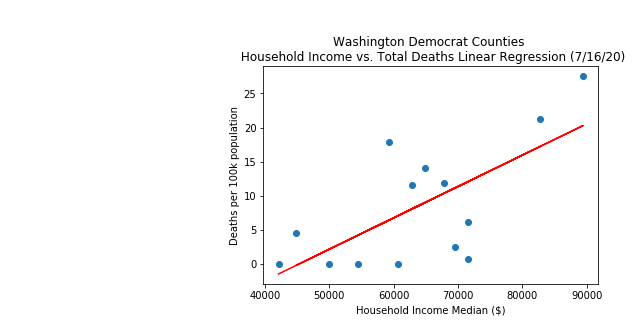

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_dem["Household Income Median"], covid_dem["Deaths_per100k"])
regress_values = covid_dem["Household Income Median"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(covid_dem["Household Income Median"], covid_dem["Deaths_per100k"])
plt.plot(covid_dem["Household Income Median"],regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Household Income Median ($)')
plt.ylabel('Deaths per 100k population')    
plt.title("Washington Democrat Counties \n Household Income vs. Total Deaths Linear Regression (7/16/20)")
print("R value = ", round(rvalue, 2))
print("R squared = ", round(rvalue*rvalue, 2))
print("p value =", pvalue, ", significant at the alpha of .05")
plt.savefig("graphs/regd_d_c.png")